# Outline

## Make linegraphs to plot numbers and or percentages of various molecularly defined cell types as a function of mediolateral position within the ZI


In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# Make DataFrames from: 
## 1) Cell Profiler Output Image.csv
## 2) .csv containing the file names and their associated mediolateral positions

In [2]:
cellprofilerDF = pd.read_csv('/Volumes/ryanKast/RKDATA/ConfocalData/SDC/RNAscope/V2/ZI/Sagittal/FINALSET_FIRSTTIER/Spp1_Nos1_Kcng2/CellProfilerOutput/Spp1_ii24_Nos1_ii36/Spp1Nos1Kcng2_CellPoseKcng2_092122Image.csv')
filename_MLpositionDF = pd.read_csv("/Volumes/ryanKast/RKDATA/ConfocalData/SDC/RNAscope/V2/ZI/Sagittal/FINALSET_FIRSTTIER/RNAscope_Filename_MLposition.csv")


In [3]:
whichimages = pd.read_csv('/Volumes/ryanKast/RKDATA/ConfocalData/SDC/RNAscope/V2/ZI/Sagittal/FINALSET_FIRSTTIER/PythonAnalysis/ImageSetLevel/Kcng2Nos1Spp1_ImagesLimited.csv')


In [4]:
theseimages = [i[:16] + '_4ChannelCropped.tif' for i in whichimages['Filename'].tolist()]

In [5]:
theseimages

['MAX_6700-1-1A-S3_4ChannelCropped.tif',
 'MAX_6700-1-1A-S4_4ChannelCropped.tif',
 'MAX_6700-1-2A-S3_4ChannelCropped.tif',
 'MAX_6700-1-2A-S4_4ChannelCropped.tif',
 'MAX_6700-1-3A-S1_4ChannelCropped.tif',
 'MAX_6700-1-3A-S3_4ChannelCropped.tif',
 'MAX_6700-1-4A-S2_4ChannelCropped.tif',
 'MAX_6700-1-4A-S3_4ChannelCropped.tif',
 'MAX_6700-2-1A-S3_4ChannelCropped.tif',
 'MAX_6700-2-1A-S4_4ChannelCropped.tif',
 'MAX_6700-2-2A-S2_4ChannelCropped.tif',
 'MAX_6700-2-2A-S4_4ChannelCropped.tif',
 'MAX_6700-2-3A-S2_4ChannelCropped.tif',
 'MAX_6700-2-3A-S4_4ChannelCropped.tif',
 'MAX_6700-2-4A-S1_4ChannelCropped.tif',
 'MAX_6700-2-4A-S2_4ChannelCropped.tif',
 'MAX_7200-1-1D-S2_4ChannelCropped.tif',
 'MAX_7200-1-1D-S4_4ChannelCropped.tif',
 'MAX_7200-1-2D-S2_4ChannelCropped.tif',
 'MAX_7200-1-2D-S3_4ChannelCropped.tif',
 'MAX_7200-1-3D-S2_4ChannelCropped.tif',
 'MAX_7200-1-3D-S4_4ChannelCropped.tif',
 'MAX_7200-1-4D-S1_4ChannelCropped.tif',
 'MAX_7200-1-4D-S3_4ChannelCropped.tif']

In [6]:
CTlist = [i for i in cellprofilerDF.columns.tolist() if (i.find('Count_CT_') != -1) & 
                                               (i.find('DAPI') == -1) &
                                               (i.find('neg') == -1)] 

ParentProbe = [i for i in CTlist if i.find('Neurons') != -1][0]

In [7]:
CTlist

['Count_CT_Kcng2Neurons',
 'Count_CT_Kcng2only',
 'Count_CT_Nos1_Kcng2',
 'Count_CT_Nos1_Spp1_Kcng2',
 'Count_CT_Spp1_Kcng2']

In [8]:
cellprofilerDF = cellprofilerDF[cellprofilerDF['FileName_RAW'].isin(theseimages)]

In [9]:
cellprofilerDF

,Count_CT_DAPI,Count_CT_Kcng2Neurons,Count_CT_Kcng2_Nos1neg,Count_CT_Kcng2only,Count_CT_Nos1_Kcng2,Count_CT_Nos1_Spp1_Kcng2,Count_CT_Spp1_Kcng2,ExecutionTime_01Images,ExecutionTime_02Metadata,ExecutionTime_03NamesAndTypes,...,Threshold_SumOfEntropies_Spp1Robust,Threshold_WeightedVariance_CT_DAPI,Threshold_WeightedVariance_CT_Kcng2Neurons,Threshold_WeightedVariance_Kcng2Robust,Threshold_WeightedVariance_Nos1Robust,Threshold_WeightedVariance_Spp1Robust,URL_CellPoseMasks,URL_RAW,Width_CellPoseMasks,Width_RAW
0,2739.0,142.0,77.0,69.0,65.0,6.0,14.0,0.0,0.0,1.45,...,-10.305529,8.811956,0.137278,7.260870,2.254774,4.506730,file:/mnt/share/RKDATA/ConfocalData/SDC/RNAsco...,file:/mnt/share/RKDATA/ConfocalData/SDC/RNAsco...,1521,1521
1,2418.0,113.0,70.0,54.0,43.0,4.0,20.0,0.0,0.0,1.50,...,-11.587136,7.998126,0.117179,7.028352,2.029204,4.086371,file:/mnt/share/RKDATA/ConfocalData/SDC/RNAsco...,file:/mnt/share/RKDATA/ConfocalData/SDC/RNAsco...,1836,1836
2,2542.0,106.0,43.0,30.0,63.0,2.0,15.0,0.0,0.0,1.53,...,-11.422067,8.033294,0.113737,6.464472,2.089958,3.978368,file:/mnt/share/RKDATA/ConfocalData/SDC/RNAsco...,file:/mnt/share/RKDATA/ConfocalData/SDC/RNAsco...,1640,1640
3,3001.0,132.0,63.0,47.0,69.0,6.0,22.0,0.0,0.0,1.62,...,-11.967962,6.571112,0.104585,6.840483,1.855045,3.403072,file:/mnt/share/RKDATA/ConfocalData/SDC/RNAsco...,file:/mnt/share/RKDATA/ConfocalData/SDC/RNAsco...,1916,1916
4,2835.0,149.0,54.0,45.0,95.0,13.0,22.0,0.0,0.0,1.63,...,-12.037119,6.973766,0.107801,6.541238,1.999478,3.722931,file:/mnt/share/RKDATA/ConfocalData/SDC/RNAsco...,file:/mnt/share/RKDATA/ConfocalData/SDC/RNAsco...,1972,1972
5,2918.0,119.0,107.0,94.0,12.0,0.0,13.0,0.0,0.0,1.47,...,-10.267375,10.522882,0.107062,4.213874,1.300930,2.774641,file:/mnt/share/RKDATA/ConfocalData/SDC/RNAsco...,file:/mnt/share/RKDATA/ConfocalData/SDC/RNAsco...,1653,1968
6,947.0,58.0,40.0,39.0,18.0,0.0,1.0,0.0,0.0,0.70,...,-10.889648,7.115723,0.120216,7.074494,2.058146,3.676885,file:/mnt/share/RKDATA/ConfocalData/SDC/RNAsco...,file:/mnt/share/RKDATA/ConfocalData/SDC/RNAsco...,1407,1407
7,599.0,45.0,42.0,36.0,3.0,0.0,6.0,0.0,0.0,0.85,...,-7.521155,9.597162,0.162252,5.969981,1.627235,5.345300,file:/mnt/share/RKDATA/ConfocalData/SDC/RNAsco...,file:/mnt/share/RKDATA/ConfocalData/SDC/RNAsco...,1425,1425
8,2591.0,121.0,73.0,60.0,48.0,3.0,16.0,0.0,0.0,0.48,...,-11.677204,7.935213,0.103235,7.058188,1.888093,4.204057,file:/mnt/share/RKDATA/ConfocalData/SDC/RNAsco...,file:/mnt/share/RKDATA/ConfocalData/SDC/RNAsco...,1749,1749
9,2705.0,113.0,52.0,46.0,61.0,2.0,8.0,0.0,0.0,1.24,...,-11.476096,8.033285,0.107081,7.833171,1.838217,3.680717,file:/mnt/share/RKDATA/ConfocalData/SDC/RNAsco...,file:/mnt/share/RKDATA/ConfocalData/SDC/RNAsco...,1743,1743


# Calculate the counts for any cell types that weren't explicitly measured by CellProfiler, but that can calculated by adding and subtracting other celltypes

### "Pure" Cell Types: 
Reflect double positive cells that are not triple positive (e.g. Pure Kcng2_Gad2 cells do not express Pax6)

### "Only" Cell Types:
Reflect the counts of singly positive cells (e.g. Count_Gad2_only cells express Gad2, but not other genes)

In [10]:
cellprofilerDF['Count_CT_Pure_Nos1_Kcng2'] = cellprofilerDF['Count_CT_Nos1_Kcng2'] - cellprofilerDF['Count_CT_Nos1_Spp1_Kcng2']


In [11]:
cellprofilerDF['Count_CT_Pure_Spp1_Kcng2'] = cellprofilerDF['Count_CT_Spp1_Kcng2'] - cellprofilerDF['Count_CT_Nos1_Spp1_Kcng2']


In [12]:
makedictlist = [i[:16] for i in cellprofilerDF['FileName_RAW'].unique().tolist()]

In [13]:
cellprofilerDF['FileName_RAW']

0     MAX_6700-1-1A-S3_4ChannelCropped.tif
1     MAX_6700-1-1A-S4_4ChannelCropped.tif
2     MAX_6700-1-2A-S3_4ChannelCropped.tif
3     MAX_6700-1-2A-S4_4ChannelCropped.tif
4     MAX_6700-1-3A-S1_4ChannelCropped.tif
5     MAX_6700-1-3A-S3_4ChannelCropped.tif
6     MAX_6700-1-4A-S2_4ChannelCropped.tif
7     MAX_6700-1-4A-S3_4ChannelCropped.tif
8     MAX_6700-2-1A-S3_4ChannelCropped.tif
9     MAX_6700-2-1A-S4_4ChannelCropped.tif
10    MAX_6700-2-2A-S2_4ChannelCropped.tif
11    MAX_6700-2-2A-S4_4ChannelCropped.tif
12    MAX_6700-2-3A-S2_4ChannelCropped.tif
13    MAX_6700-2-3A-S4_4ChannelCropped.tif
14    MAX_6700-2-4A-S1_4ChannelCropped.tif
15    MAX_7200-1-1D-S2_4ChannelCropped.tif
17    MAX_7200-1-1D-S4_4ChannelCropped.tif
18    MAX_7200-1-2D-S2_4ChannelCropped.tif
19    MAX_7200-1-2D-S3_4ChannelCropped.tif
21    MAX_7200-1-3D-S2_4ChannelCropped.tif
23    MAX_7200-1-3D-S4_4ChannelCropped.tif
24    MAX_7200-1-4D-S1_4ChannelCropped.tif
26    MAX_7200-1-4D-S3_4ChannelCropped.tif
Name: FileN

In [14]:
ImageNumDict = {}

In [15]:
mouse = '6700-1'
makedictlistmouse = [i for i in makedictlist if i.find(mouse) != -1]
makedictlistmouse

leng = len(makedictlistmouse)

ImageNumDict2 = dict(zip(makedictlistmouse,list(range(1,leng+1))))

ImageNumDict.update(ImageNumDict2)

In [16]:
mouse = '6700-2'
makedictlistmouse = [i for i in makedictlist if i.find(mouse) != -1]
makedictlistmouse

leng = len(makedictlistmouse)

ImageNumDict2 = dict(zip(makedictlistmouse,list(range(1,leng+1))))

ImageNumDict.update(ImageNumDict2)

In [17]:
mouse = '7200-1'
makedictlistmouse = [i for i in makedictlist if i.find(mouse) != -1]
makedictlistmouse

leng = len(makedictlistmouse)

ImageNumDict2 = dict(zip(makedictlistmouse,list(range(1,leng+1))))

ImageNumDict.update(ImageNumDict2)

In [18]:
ImageNumDict

{'MAX_6700-1-1A-S3': 1,
 'MAX_6700-1-1A-S4': 2,
 'MAX_6700-1-2A-S3': 3,
 'MAX_6700-1-2A-S4': 4,
 'MAX_6700-1-3A-S1': 5,
 'MAX_6700-1-3A-S3': 6,
 'MAX_6700-1-4A-S2': 7,
 'MAX_6700-1-4A-S3': 8,
 'MAX_6700-2-1A-S3': 1,
 'MAX_6700-2-1A-S4': 2,
 'MAX_6700-2-2A-S2': 3,
 'MAX_6700-2-2A-S4': 4,
 'MAX_6700-2-3A-S2': 5,
 'MAX_6700-2-3A-S4': 6,
 'MAX_6700-2-4A-S1': 7,
 'MAX_7200-1-1D-S2': 1,
 'MAX_7200-1-1D-S4': 2,
 'MAX_7200-1-2D-S2': 3,
 'MAX_7200-1-2D-S3': 4,
 'MAX_7200-1-3D-S2': 5,
 'MAX_7200-1-3D-S4': 6,
 'MAX_7200-1-4D-S1': 7,
 'MAX_7200-1-4D-S3': 8}

In [19]:
def make_ML_dictionary(mediolateralDF): 
    
    
    """
        This function creates a dictionary from a dataframe, wherein one column containing the Filenames becomes
        the keys of the dictionary, and the other column containing the ML positions of those images, becomes the
        values of the dictionary
    """
    
    mediolateralDF = mediolateralDF[['Filename','ML Position']]

    #Create a dictionary wherein Keys = Filenames and Values = Mediolateral positions
    dict_image_MLposition = {}

    for i in range(len(mediolateralDF)):
        #The part of the filename we want is 16 characters long, so slices the string to the 16th character 
        #When creating the filename
        dict_image_MLposition[mediolateralDF.iloc[i,0][:16]] = mediolateralDF.iloc[i,1]
    
    return dict_image_MLposition

In [20]:
def modify_cp_dataframe(DF, med_lat_dict, bins = False): 
    
    """
        This function modifies the subject dataframe by adding the following columns:
        (1) MouseID column 
        (2) ML Position Column
        (3) (Optional) a Binned ML Position column if bins = True
        
        The function requires the following arguments:
            1. DF - the dataframe to be processed (typically an Image Level DataFrame output from CellProfiler)
            2. med_lat_dict - a dictionary containing the FileName_RAW strings as keys and the ML positions as values
            3. bins (optional) - a list (can be generated with np.arange()) of the bin delimiters.
        
        The function returns the following output:
            1. DF - dataframe with the added columns
    """
    
    #Make a list of the Mouse IDs from the image filenames in your CellProfiler Dataframe 
    #and assign them to a new column (Mouse ID) in the DF
    MouseIDlist = []

    for i in range(0, len(DF)):
        IDstart = DF.iloc[i].FileName_RAW.find('_')
        IDmid = DF.iloc[i].FileName_RAW.find('-',IDstart)
        IDend = DF.iloc[i].FileName_RAW.find('-',IDmid)
        MouseIDlist.append(DF.iloc[i].FileName_RAW[IDstart+1:IDend+2])

    DF['Mouse ID'] = MouseIDlist

    
    #Create a list of the mediolateral positions of each image and then assign this 
    #list as a new column to our primary dataframe

    listMLposition = []

    #Use the length of the dataframe as a range to iterate
    #Each round of the for loop will call the 'Filename' column of the current row by using the .iloc[] indexing method
    #The retrieved 'Filename' will then be used to call the appropriate ML position from the dictionary
    for i in range(len(DF)):
        listMLposition.append(med_lat_dict[DF.iloc[i]['FileName_RAW'][0:16]])

    DF['ML Position'] = listMLposition
    
    #convert the object type ML positions to numeric (float) variables
    DF['ML Position'] = pd.to_numeric(DF['ML Position'])
    
    
    
    #Can modify the boundaries of the anatomical bins here
    if bins == True:
        DF['Binned ML Position'] = pd.cut(DF['ML Position'],
                                             bins=np.arange(0.8, 2.4, 0.2).tolist(),
                                             labels=np.arange(0.8, 2.2, 0.2).tolist())

    
    return DF

In [21]:
def make_percent_cells_DF(DF, probelist, parentprobe):
    
    """
        This function calculates the fraction of the total "parentprobe" (most inclusive, widely expressed transcript) 
        expressing population that is positive for each combination of transcripts probed in the image set. These 
        percentage/fractional values are appended to the dataframe as new columns
        
        The function requires 3 input arguments:
            1. DF - the dataframe to be processed (typically an Image Level DataFrame output from CellProfiler)
            2. probelist - a list of the probes included in the image set
            3. parentprobe - the most broadly stratifying (highest tier) marker to be further subdivided by other probes
          
        The function returns the following output:
            1. percentplotDF - the dataframe with the added percentage columns
    """
    
    percentlist = []
    markerpercentlist = []
    imagelist = []
    MLlist = []
    MouseIDlist = []
    
    cols = DF.columns.tolist()
    cols = [i for i in cols if i.find('Count_') != -1]
    
    for column in cols:
        
        for i in range(len(DF)):

            percentage = DF[column].iloc[i] / DF['Count_' + parentprobe].iloc[i]
            percentlist.append(percentage)
            percenttype = column + ' / ' + 'Count_' + parentprobe
            markerpercentlist.append(percenttype)
            image = DF.iloc[i]['FileName_RAW'][0:16]
            imagelist.append(image)
            MLlist.append(DF['ML Position'].iloc[i])
            MouseIDlist.append(DF['Mouse ID'].iloc[i])
                        

    percentplotDF = pd.DataFrame()
    percentplotDF['ML Position'] = MLlist    
    percentplotDF['Image']  = imagelist
    percentplotDF['Percent'] = percentlist
    percentplotDF['MarkerCombo'] = markerpercentlist
    percentplotDF['Mouse ID'] = MouseIDlist
    
    return percentplotDF

In [22]:
def modify_percent_DF(DF, probelist, triple, parentprobe):
    
    cols = DF.columns.tolist()
    marks = DF['MarkerCombo'].unique().tolist()
    
    for item in DF['Image'].unique().tolist():
        
        temp = DF[DF['Image'] == item]
        
        for combo in marks:
            
            for probe in probelist:
                
                if (combo.find(probe) != -1) & (combo.find(parentprobe) != -1) & (combo.find(' / ' + mastercombo) == -1):
                    adj = temp[temp['MarkerCombo'] == combo]['Percent'] - temp[temp['MarkerCombo'] == triple]['Percent']
                    
                    new = pd.DataFrame(data = {cols[0] : temp.iloc[0]['ML Position'],
                                               cols[1] : temp.iloc[0]['Image'],
                                               cols[2] : adj,
                                               cols[3] : 'Adjusted ' + combo,
                                               cols[4] : temp.iloc[0]['Mouse ID'],
                                               cols[5] : temp.iloc[0]['Binned ML Position']})
                                    
                    DF = pd.concat([DF, new])
                    
   
    return DF

In [23]:
def make_percent_sum_DF(DF, probelist):
    
    """
        This function calculates the percentage of probe+ cells in the entire image set that are positive for
        other probes and probe combinations.
        
        The function requires 2 input arguments:
            1. DF - the image level dataframe containing the counts for the entire image set
            2. probelist - a list of the transcripts probed in the image set 
        
        The function returns the following output:
            1. sumDF - a dataframe with the cross-image sums and image set-wide calculated percentages 
                       for colocalization
    """
    
    cpsumDF = DF.sum()
    percentlist = []
    markerpercentlist = []

    
    cols = DF.columns.tolist()
    cols = [i for i in cols if i.find('Count_') != -1]
    
    for column1 in cols:
        for column2 in cols:
            percentage = cpsumDF[column1]/cpsumDF.loc[column2]
            percentlist.append(percentage)
            percenttype = column1 + ' / ' + column2
            markerpercentlist.append(percenttype)

    sumDF = pd.DataFrame()
    sumDF['MarkerCombo'] = markerpercentlist
    sumDF['Percent'] = percentlist
    
    
    return sumDF

# Run Functions

In [24]:
med_lat_dict = make_ML_dictionary(filename_MLpositionDF)
cellprofilerDF = modify_cp_dataframe(cellprofilerDF,med_lat_dict, bins = True)




In [25]:
percentplotDF = make_percent_cells_DF(DF=cellprofilerDF, 
                                      probelist = ['Nos1','Spp1'],
                                      parentprobe = 'CT_Kcng2Neurons')




In [26]:
percentplotDF['Binned ML Position'] = pd.cut(percentplotDF['ML Position'],
                                             bins=np.arange(0.8, 2.4, 0.2).tolist(),
                                             labels=np.arange(0.8, 2.2, 0.2).tolist())

In [27]:
ImagePosition = []

for i in range(len(percentplotDF)):
    ImagePosition.append(ImageNumDict[percentplotDF.iloc[i]['Image']])

percentplotDF['Image Position'] = ImagePosition

In [28]:
ImagePosition = []

for i in range(len(cellprofilerDF)):
    ImagePosition.append(ImageNumDict[cellprofilerDF.iloc[i]['FileName_RAW'][:16]])

cellprofilerDF['Image Position'] = ImagePosition

In [29]:
cellprofilerDF['Image Position']

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     1
9     2
10    3
11    4
12    5
13    6
14    7
15    1
17    2
18    3
19    4
21    5
23    6
24    7
26    8
Name: Image Position, dtype: int64

In [30]:
percentplotDF

,ML Position,Image,Percent,MarkerCombo,Mouse ID,Binned ML Position,Image Position
0,2.22,MAX_6700-1-1A-S3,19.288732,Count_CT_DAPI / Count_CT_Kcng2Neurons,6700-1,NaN,1
1,2.10,MAX_6700-1-1A-S4,21.398230,Count_CT_DAPI / Count_CT_Kcng2Neurons,6700-1,2.0,2
2,1.80,MAX_6700-1-2A-S3,23.981132,Count_CT_DAPI / Count_CT_Kcng2Neurons,6700-1,1.8,3
3,1.68,MAX_6700-1-2A-S4,22.734848,Count_CT_DAPI / Count_CT_Kcng2Neurons,6700-1,1.6,4
4,1.44,MAX_6700-1-3A-S1,19.026846,Count_CT_DAPI / Count_CT_Kcng2Neurons,6700-1,1.4,5
...,...,...,...,...,...,...,...
202,1.86,MAX_7200-1-2D-S3,0.106796,Count_CT_Pure_Spp1_Kcng2 / Count_CT_Kcng2Neurons,7200-1,1.8,4
203,1.68,MAX_7200-1-3D-S2,0.081301,Count_CT_Pure_Spp1_Kcng2 / Count_CT_Kcng2Neurons,7200-1,1.6,5
204,1.32,MAX_7200-1-3D-S4,0.010256,Count_CT_Pure_Spp1_Kcng2 / Count_CT_Kcng2Neurons,7200-1,1.2,6
205,1.20,MAX_7200-1-4D-S1,0.063063,Count_CT_Pure_Spp1_Kcng2 / Count_CT_Kcng2Neurons,7200-1,1.0,7


In [31]:
percentplotDF[percentplotDF['MarkerCombo'] ==  'Count_CT_Nos1_Spp1_Kcng2 / Count_CT_Kcng2Neurons']

,ML Position,Image,Percent,MarkerCombo,Mouse ID,Binned ML Position,Image Position
115,2.22,MAX_6700-1-1A-S3,0.042254,Count_CT_Nos1_Spp1_Kcng2 / Count_CT_Kcng2Neurons,6700-1,NaN,1
116,2.10,MAX_6700-1-1A-S4,0.035398,Count_CT_Nos1_Spp1_Kcng2 / Count_CT_Kcng2Neurons,6700-1,2.0,2
117,1.80,MAX_6700-1-2A-S3,0.018868,Count_CT_Nos1_Spp1_Kcng2 / Count_CT_Kcng2Neurons,6700-1,1.8,3
118,1.68,MAX_6700-1-2A-S4,0.045455,Count_CT_Nos1_Spp1_Kcng2 / Count_CT_Kcng2Neurons,6700-1,1.6,4
119,1.44,MAX_6700-1-3A-S1,0.087248,Count_CT_Nos1_Spp1_Kcng2 / Count_CT_Kcng2Neurons,6700-1,1.4,5
120,1.32,MAX_6700-1-3A-S3,0.000000,Count_CT_Nos1_Spp1_Kcng2 / Count_CT_Kcng2Neurons,6700-1,1.2,6
121,0.72,MAX_6700-1-4A-S2,0.000000,Count_CT_Nos1_Spp1_Kcng2 / Count_CT_Kcng2Neurons,6700-1,NaN,7
122,0.48,MAX_6700-1-4A-S3,0.000000,Count_CT_Nos1_Spp1_Kcng2 / Count_CT_Kcng2Neurons,6700-1,NaN,8
123,1.98,MAX_6700-2-1A-S3,0.024793,Count_CT_Nos1_Spp1_Kcng2 / Count_CT_Kcng2Neurons,6700-2,1.8,1
124,1.92,MAX_6700-2-1A-S4,0.017699,Count_CT_Nos1_Spp1_Kcng2 / Count_CT_Kcng2Neurons,6700-2,1.8,2


In [32]:
cellprofilerDF.columns.tolist()

['Count_CT_DAPI',
 'Count_CT_Kcng2Neurons',
 'Count_CT_Kcng2_Nos1neg',
 'Count_CT_Kcng2only',
 'Count_CT_Nos1_Kcng2',
 'Count_CT_Nos1_Spp1_Kcng2',
 'Count_CT_Spp1_Kcng2',
 'ExecutionTime_01Images',
 'ExecutionTime_02Metadata',
 'ExecutionTime_03NamesAndTypes',
 'ExecutionTime_04Groups',
 'ExecutionTime_05ColorToGray',
 'ExecutionTime_06IdentifyPrimaryObjects',
 'ExecutionTime_07Smooth',
 'ExecutionTime_08MeasureImageIntensity',
 'ExecutionTime_09IdentifyPrimaryObjects',
 'ExecutionTime_10Smooth',
 'ExecutionTime_11Smooth',
 'ExecutionTime_12Smooth',
 'ExecutionTime_13MeasureImageIntensity',
 'ExecutionTime_14RescaleIntensity',
 'ExecutionTime_15RescaleIntensity',
 'ExecutionTime_16RescaleIntensity',
 'ExecutionTime_17Threshold',
 'ExecutionTime_18Threshold',
 'ExecutionTime_19Threshold',
 'ExecutionTime_20MeasureObjectIntensity',
 'ExecutionTime_22FilterObjects',
 'ExecutionTime_23FilterObjects',
 'ExecutionTime_27MaskObjects',
 'ExecutionTime_28MaskObjects',
 'ExecutionTime_29MaskObje

In [33]:
cols = [i for i in cellprofilerDF.columns.tolist() if i.find('Count') >= 0]


In [34]:
parentcols = [i for i in cols if i.find(ParentProbe) >= 0]


In [35]:
for a in cols:
    
    for b in parentcols:
        
        new_col = a + " / " + b
        cellprofilerDF[new_col] = cellprofilerDF[a] / cellprofilerDF[b]
            

In [36]:
percentcols = [i for i in cellprofilerDF.columns.tolist() if i.find('/ ' + ParentProbe) >= 0]

cellprofilerDF[percentcols]

,Count_CT_DAPI / Count_CT_Kcng2Neurons,Count_CT_Kcng2Neurons / Count_CT_Kcng2Neurons,Count_CT_Kcng2_Nos1neg / Count_CT_Kcng2Neurons,Count_CT_Kcng2only / Count_CT_Kcng2Neurons,Count_CT_Nos1_Kcng2 / Count_CT_Kcng2Neurons,Count_CT_Nos1_Spp1_Kcng2 / Count_CT_Kcng2Neurons,Count_CT_Spp1_Kcng2 / Count_CT_Kcng2Neurons,Count_CT_Pure_Nos1_Kcng2 / Count_CT_Kcng2Neurons,Count_CT_Pure_Spp1_Kcng2 / Count_CT_Kcng2Neurons
0,19.288732,1.0,0.542254,0.485915,0.457746,0.042254,0.098592,0.415493,0.056338
1,21.398230,1.0,0.619469,0.477876,0.380531,0.035398,0.176991,0.345133,0.141593
2,23.981132,1.0,0.405660,0.283019,0.594340,0.018868,0.141509,0.575472,0.122642
3,22.734848,1.0,0.477273,0.356061,0.522727,0.045455,0.166667,0.477273,0.121212
4,19.026846,1.0,0.362416,0.302013,0.637584,0.087248,0.147651,0.550336,0.060403
5,24.521008,1.0,0.899160,0.789916,0.100840,0.000000,0.109244,0.100840,0.109244
6,16.327586,1.0,0.689655,0.672414,0.310345,0.000000,0.017241,0.310345,0.017241
7,13.311111,1.0,0.933333,0.800000,0.066667,0.000000,0.133333,0.066667,0.133333
8,21.413223,1.0,0.603306,0.495868,0.396694,0.024793,0.132231,0.371901,0.107438
9,23.938053,1.0,0.460177,0.407080,0.539823,0.017699,0.070796,0.522124,0.053097


In [37]:
cellprofilerDF['ML Position']

0     2.22
1     2.10
2     1.80
3     1.68
4     1.44
5     1.32
6     0.72
7     0.48
8     1.98
9     1.92
10    1.74
11    1.50
12    1.20
13    0.66
14    0.54
15    2.16
17    2.04
18    1.92
19    1.86
21    1.68
23    1.32
24    1.20
26    0.96
Name: ML Position, dtype: float64

# Plots

In [38]:
savedir = '/Volumes/ryanKast/RKDATA/ConfocalData/SDC/RNAscope/V2/ZI/Sagittal/FINALSET_FIRSTTIER/PythonAnalysis/Plots/Kcng2Nos1Spp1/'
sns.set_theme(style = 'white', 
              font = 'arial',
              font_scale = 1)

In [39]:
[i for i in percentcols if (i.find('DAPI') == -1) &
                           (i.find('neg') == -1) &
                           (i.find('Neurons /') == -1)] 


['Count_CT_Kcng2only / Count_CT_Kcng2Neurons',
 'Count_CT_Nos1_Kcng2 / Count_CT_Kcng2Neurons',
 'Count_CT_Nos1_Spp1_Kcng2 / Count_CT_Kcng2Neurons',
 'Count_CT_Spp1_Kcng2 / Count_CT_Kcng2Neurons',
 'Count_CT_Pure_Nos1_Kcng2 / Count_CT_Kcng2Neurons',
 'Count_CT_Pure_Spp1_Kcng2 / Count_CT_Kcng2Neurons']

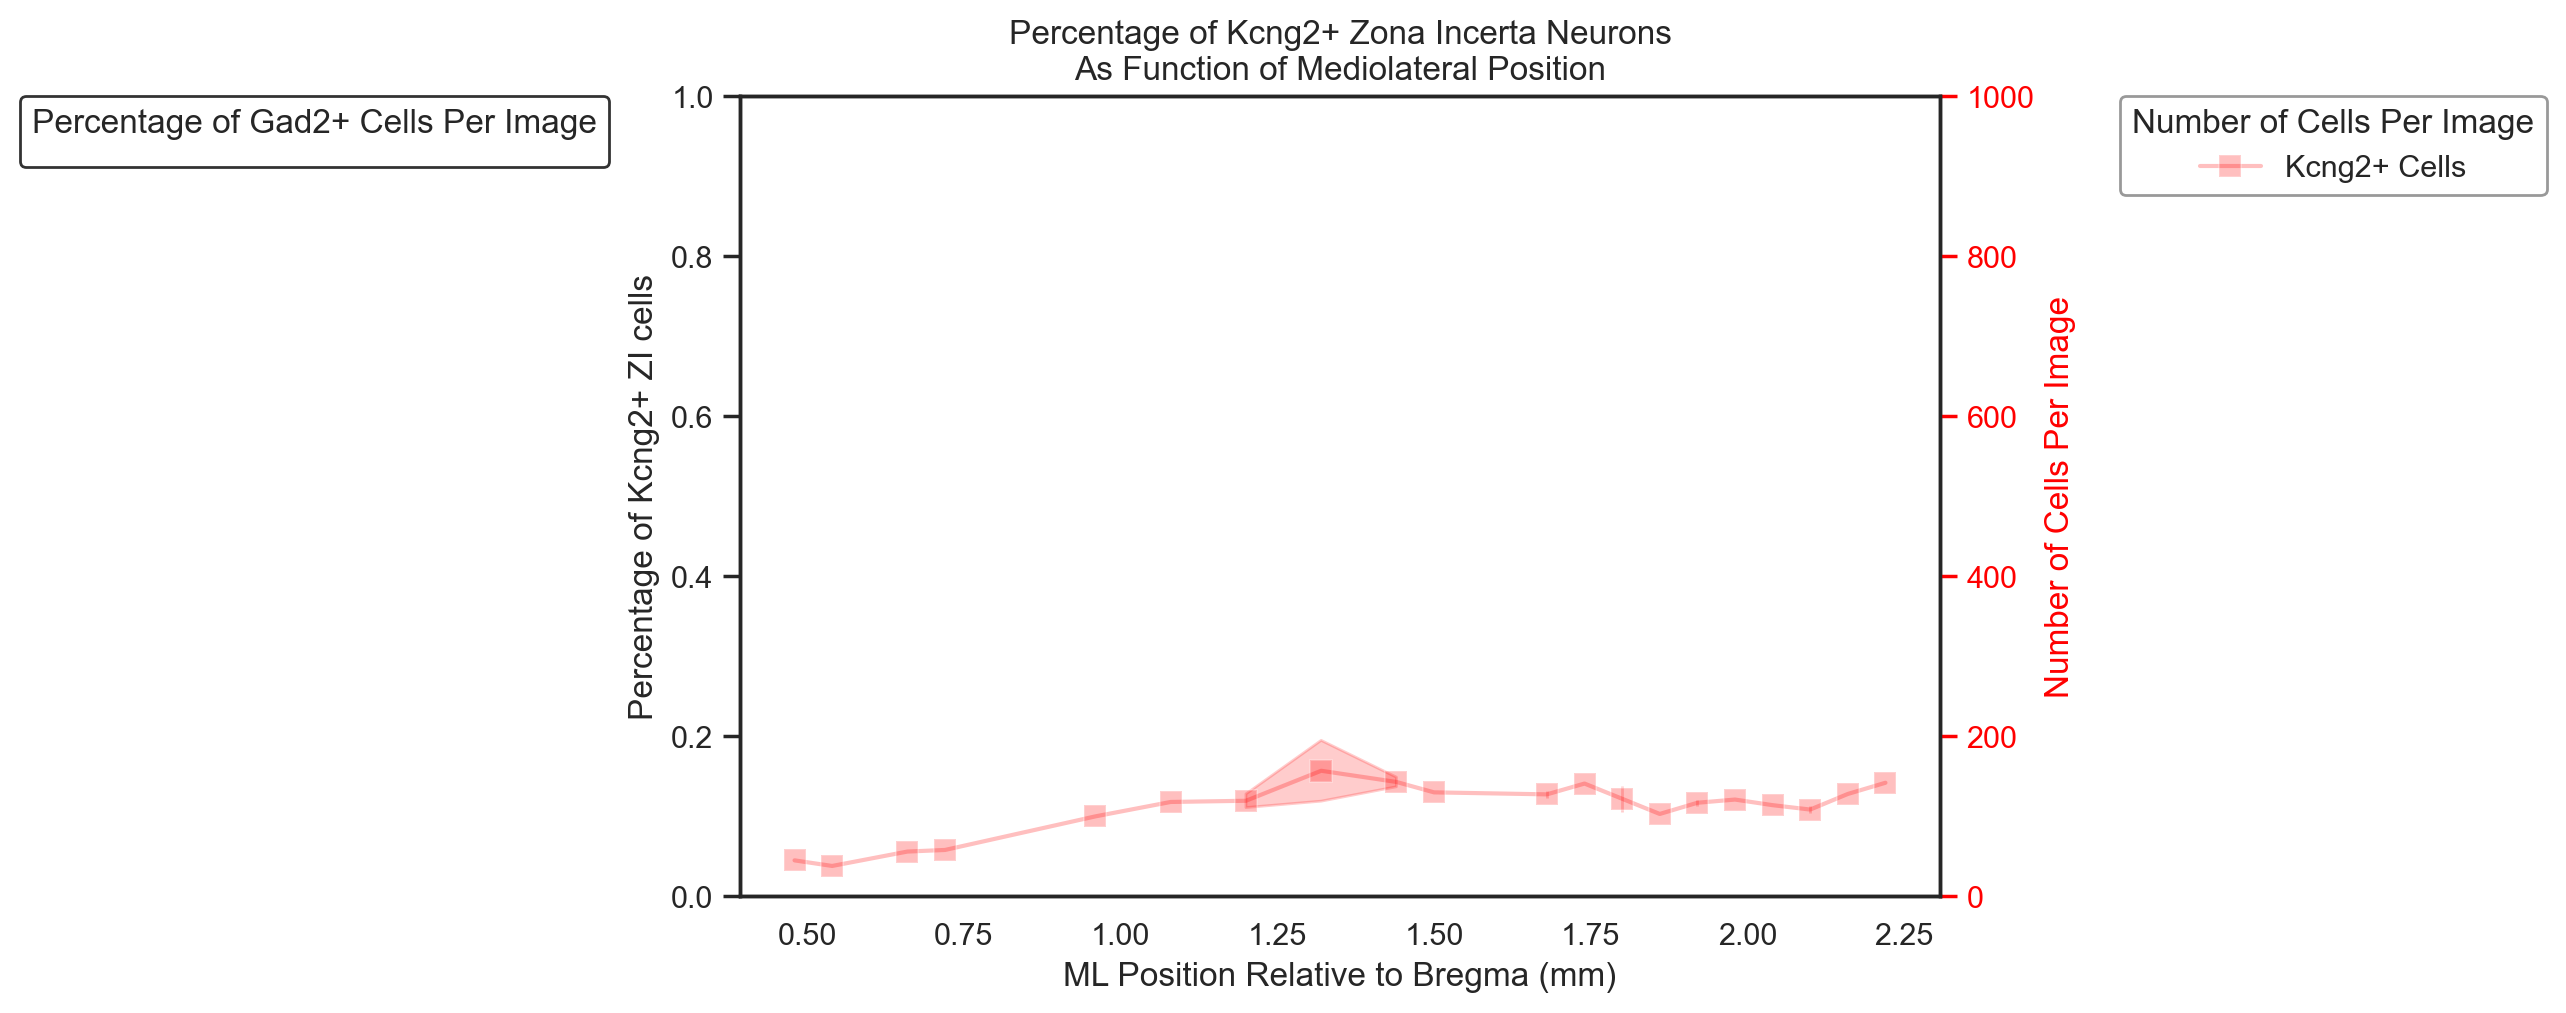

In [83]:

fig = plt.figure(figsize = (6,4), dpi = 200)

ax1 = fig.add_axes([0,0,1,1])
ax1.set_ylim(0,.5)
ax1.set_ylabel('Percentage of Kcng2+ ZI cells')
ax1.set_xlabel('ML Position Relative to Bregma (mm)')

ax2 = plt.twinx()
ax2.set_ylabel('Number of Cells Per Image')
ax2.tick_params(axis='y', colors='red')
ax2.yaxis.label.set_color('red')
#cm = ['Purple', 'Green', 'Orangered']
cm = ['darkblue', 'magenta','limegreen', ]
plt.title('Percentage of Kcng2+ Zona Incerta Neurons\nAs Function of Mediolateral Position',)

sns.lineplot(data=cellprofilerDF,
            x='ML Position', 
            y= ParentProbe,
            marker = "s",
            color = 'red',
            markersize = 8,
            #hue = 'Mouse ID',
            ax = ax2,
            alpha =0.25,
            label = 'Kcng2+ Cells'
            ).set_ylim(0,1000)

sns.lineplot(data=percentplotDF[percentplotDF['MarkerCombo'].isin([
                          'Count_CT_Pure_Kcng2_Gad2 / Count_CT_Gad2Neurons',
                          'Count_CT_Pure_Pax6_Gad2 / Count_CT_Gad2Neurons',
                          'Count_CT_Kcng2_Pax6_Gad2 / Count_CT_Gad2Neurons',])], 
             x='ML Position', 
             y='Percent', 
             hue = 'MarkerCombo',
             hue_order = ['Count_CT_Kcng2_Pax6_Gad2 / Count_CT_Gad2Neurons',
                          'Count_CT_Pure_Kcng2_Gad2 / Count_CT_Gad2Neurons',
                          'Count_CT_Pure_Pax6_Gad2 / Count_CT_Gad2Neurons'],
             marker = "o",
             markersize = 10,
             palette = cm,
             ax = ax1,
             alpha = 0.7
             ).set_ylim(0,1.0)

ax1.legend(bbox_to_anchor = (-0.6,1), 
           loc=2, 
           borderaxespad = 0, 
           labels = ['Pax6+Gad2+ ', 'Kcng2+Gad2+ ', 'Pax6+Kcng2+Gad2+'],
           title = 'Percentage of Gad2+ Cells Per Image',
           edgecolor = 'Black'
           )

ax2.legend(bbox_to_anchor = (1.15,1), 
           loc=2, 
           borderaxespad=0, 
           title = 'Number of Cells Per Image',
           edgecolor = 'Gray'
           )

#plt.savefig(savedir + 'LinePlot_Gad2Pax6Kcng2_ML_Percent_wGAD2counts.png',  bbox_inches='tight')

In [84]:
cellprofilerDF[cellprofilerDF['Mouse ID'] != '7200-1']['Mouse ID']

0     6700-1
1     6700-1
2     6700-1
3     6700-1
4     6700-1
5     6700-1
6     6700-1
7     6700-1
8     6700-2
9     6700-2
10    6700-2
11    6700-2
12    6700-2
13    6700-2
14    6700-2
Name: Mouse ID, dtype: object

Index(['ML Position', 'Image', 'Percent', 'MarkerCombo', 'Mouse ID',
       'Binned ML Position', 'Image Position'],
      dtype='object')

In [154]:
for mouse in cellprofilerDF['Mouse ID'].unique().tolist():
    x = cellprofilerDF[cellprofilerDF['Mouse ID'] == mouse]
    y = x['Image Position'].max()
    print(y)

8
7
12


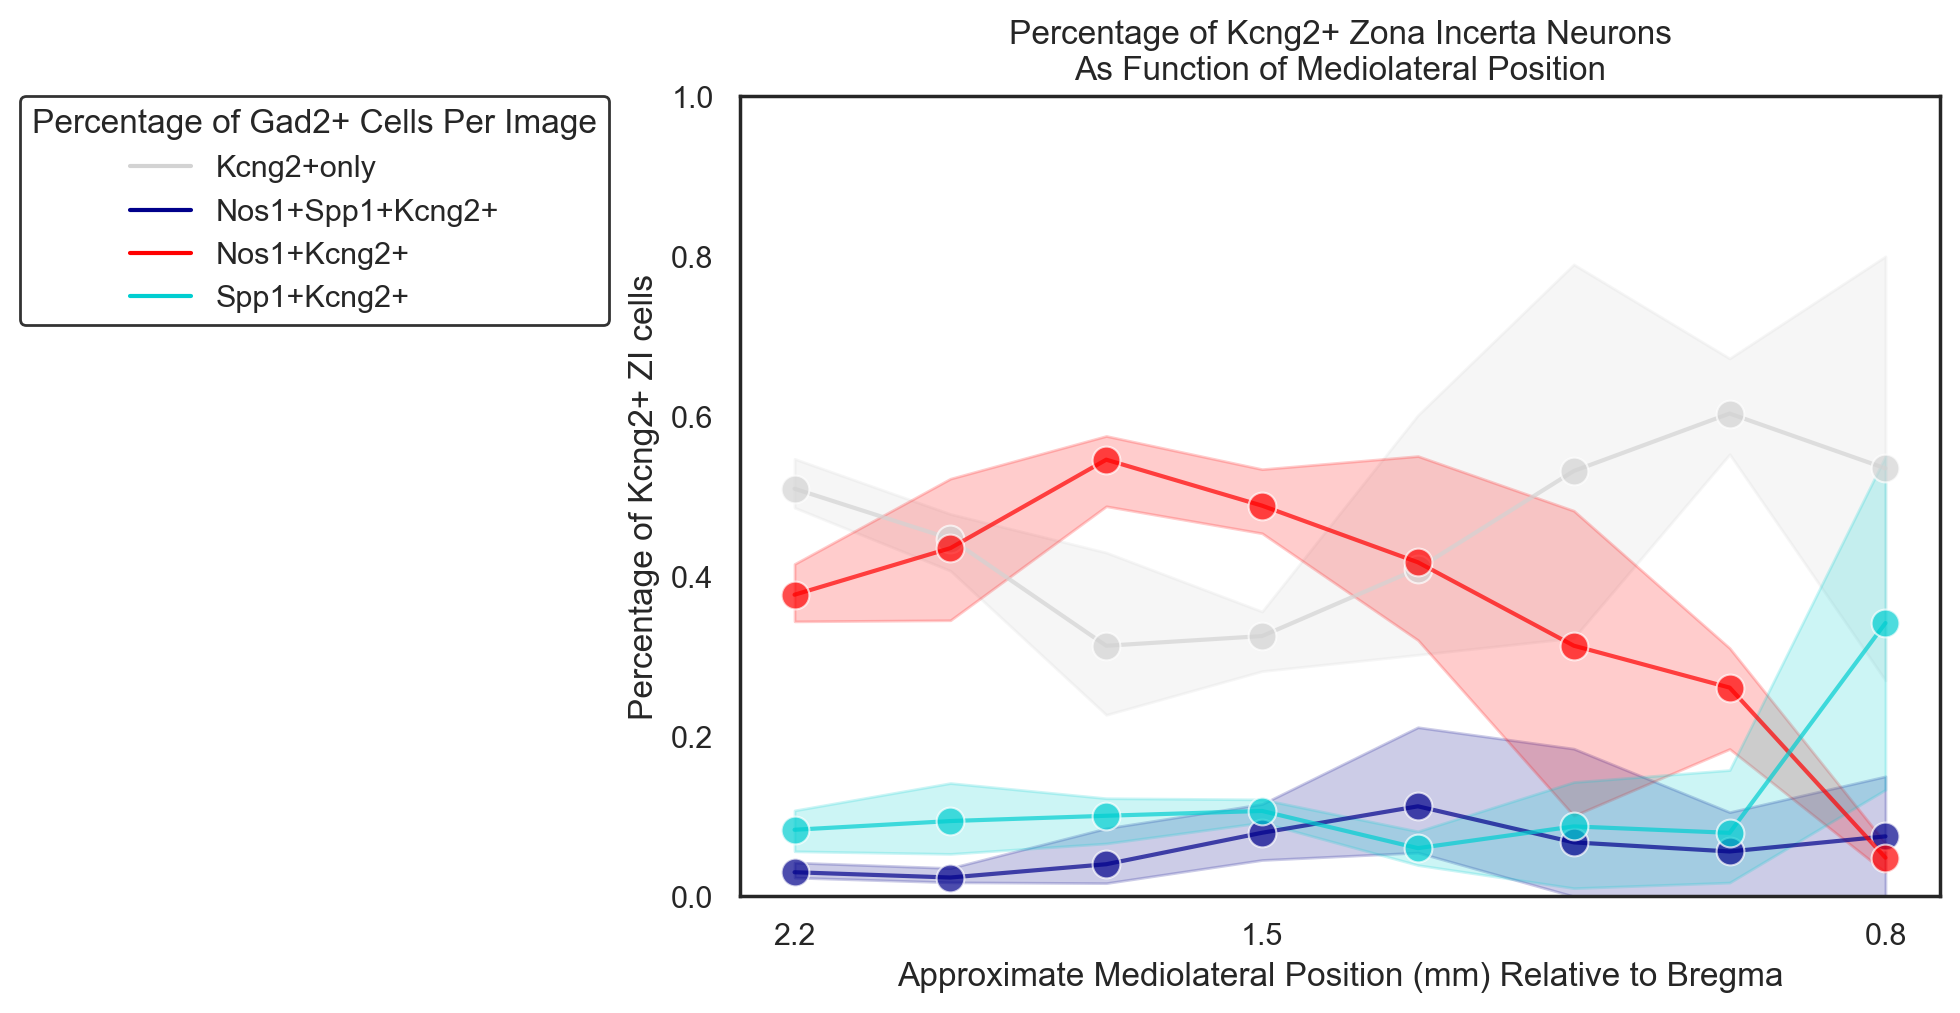

In [41]:
#plotsubsetDF = percentplotDF[percentplotDF['Mouse ID'] != '7200-1']

fig = plt.figure(figsize = (6,4), dpi = 200)

ax1 = fig.add_axes([0,0,1,1])
ax1.set_ylim(0,1)
ax1.set_ylabel('Percentage of Kcng2+ ZI cells')
ax1.set_xlabel('Approximate Mediolateral Position (mm) Relative to Bregma')
ax1.set_xticks(ticks = [1,4,8], labels = ['2.2', '1.5', '0.8'])

#cm = ['Purple', 'Green', 'Orangered']

cm = ['lightgrey', 'darkblue','red', 'darkturquoise']

plt.title('Percentage of Kcng2+ Zona Incerta Neurons\nAs Function of Mediolateral Position',)


sns.lineplot(data=percentplotDF[percentplotDF['MarkerCombo'].isin([
                         'Count_CT_Kcng2only / Count_CT_Kcng2Neurons',
                         'Count_CT_Nos1_Spp1_Kcng2 / Count_CT_Kcng2Neurons',
                         'Count_CT_Pure_Nos1_Kcng2 / Count_CT_Kcng2Neurons',
                         'Count_CT_Pure_Spp1_Kcng2 / Count_CT_Kcng2Neurons'])], 
             x='Image Position', 
             y='Percent', 
             hue = 'MarkerCombo',
             hue_order = ['Count_CT_Kcng2only / Count_CT_Kcng2Neurons',
                         'Count_CT_Nos1_Spp1_Kcng2 / Count_CT_Kcng2Neurons',
                         'Count_CT_Pure_Nos1_Kcng2 / Count_CT_Kcng2Neurons',
                         'Count_CT_Pure_Spp1_Kcng2 / Count_CT_Kcng2Neurons'],
                         
             marker = "o",
             markersize = 10,
             palette = cm,
             ax = ax1,
             alpha = 0.7
             )

h, l = ax1.get_legend_handles_labels()


ax1.legend(bbox_to_anchor = (-0.6,1), 
           loc=2, 
           borderaxespad = 0, 
           handles = h,
           labels = ['Kcng2+only', 'Nos1+Spp1+Kcng2+', 'Nos1+Kcng2+', 'Spp1+Kcng2+'],
           title = 'Percentage of Gad2+ Cells Per Image',
           edgecolor = 'Black'
           )



plt.savefig(savedir + 'LinePlot_Kcng2Nos1Spp1_ML_Percent.svg',  bbox_inches='tight')

In [42]:
percentsumDF = make_percent_sum_DF(cellprofilerDF, ['Nos1','Spp1'])

/var/folders/m1/69xtflwj783f2sqshj3hmjtr0000gn/T/ipykernel_7972/2359587043.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cpsumDF = DF.sum()


In [43]:
percentsumDF[percentsumDF['Percent'] < 1.01]

,MarkerCombo,Percent
0,Count_CT_DAPI / Count_CT_DAPI,1.000000
18,Count_CT_Kcng2Neurons / Count_CT_DAPI,0.051314
19,Count_CT_Kcng2Neurons / Count_CT_Kcng2Neurons,1.000000
36,Count_CT_Kcng2_Nos1neg / Count_CT_DAPI,0.027403
37,Count_CT_Kcng2_Nos1neg / Count_CT_Kcng2Neurons,0.534029
...,...,...
318,Count_CT_Pure_Spp1_Kcng2 / Count_CT_Kcng2Neuro...,0.240162
319,Count_CT_Pure_Spp1_Kcng2 / Count_CT_Kcng2Neuro...,0.252170
321,Count_CT_Pure_Spp1_Kcng2 / Count_CT_Kcng2Neuro...,0.646320
322,Count_CT_Pure_Spp1_Kcng2 / Count_CT_Kcng2Neuro...,0.292539


In [44]:
cols = [x for x in percentplotDF['MarkerCombo'].unique() if 
          (x.find('/ Count_CT_Kcng2Neurons') != -1) 
        & (x.find('Count_Kcng2Neurons ') == -1) 
        & (x.find('Pure') == -1)]



In [45]:
len(cellprofilerDF)

23

In [46]:
percentsumDF = percentsumDF.drop_duplicates('MarkerCombo')

In [47]:
cellprofilerDF[cellprofilerDF['Mouse ID'] == '6700-1']['Count_CT_Nos1_Spp1_Kcng2'].sum()

31.0

In [48]:
percentplotDF['MarkerCombo'].str[6:]

0                 CT_DAPI / Count_CT_Kcng2Neurons
1                 CT_DAPI / Count_CT_Kcng2Neurons
2                 CT_DAPI / Count_CT_Kcng2Neurons
3                 CT_DAPI / Count_CT_Kcng2Neurons
4                 CT_DAPI / Count_CT_Kcng2Neurons
                          ...                    
202    CT_Pure_Spp1_Kcng2 / Count_CT_Kcng2Neurons
203    CT_Pure_Spp1_Kcng2 / Count_CT_Kcng2Neurons
204    CT_Pure_Spp1_Kcng2 / Count_CT_Kcng2Neurons
205    CT_Pure_Spp1_Kcng2 / Count_CT_Kcng2Neurons
206    CT_Pure_Spp1_Kcng2 / Count_CT_Kcng2Neurons
Name: MarkerCombo, Length: 207, dtype: object

In [66]:
cols2 = ['Count_CT_Kcng2only',
         'Count_CT_Nos1_Spp1_Kcng2',
         'Count_CT_Pure_Nos1_Kcng2',
         'Count_CT_Pure_Spp1_Kcng2']



trim = cellprofilerDF[cellprofilerDF['Mouse ID'] == '7200-1'].sort_index(axis = 1)

fig = px.pie(trim.sum()[cols2], 
             names = trim.sum()[cols2].index, 
             values = trim.sum()[cols2],
             color_discrete_sequence= ['lightgrey', 'red', 'darkturquoise', 'darkblue'],
        )


config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 500,
    'width': 700,
    'scale':6 # Multiply title/legend/axis/canvas sizes by this factor
  }
}
fig.show(config=config)
fig.write_image(savedir + 'Kcng2Nos1Spp1_Pie_7200-1.svg')

/var/folders/m1/69xtflwj783f2sqshj3hmjtr0000gn/T/ipykernel_7972/311787093.py:10: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/var/folders/m1/69xtflwj783f2sqshj3hmjtr0000gn/T/ipykernel_7972/311787093.py:11: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/var/folders/m1/69xtflwj783f2sqshj3hmjtr0000gn/T/ipykernel_7972/311787093.py:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Text(0, 0.5, 'Fraction of Kcng2+ ZI cells')

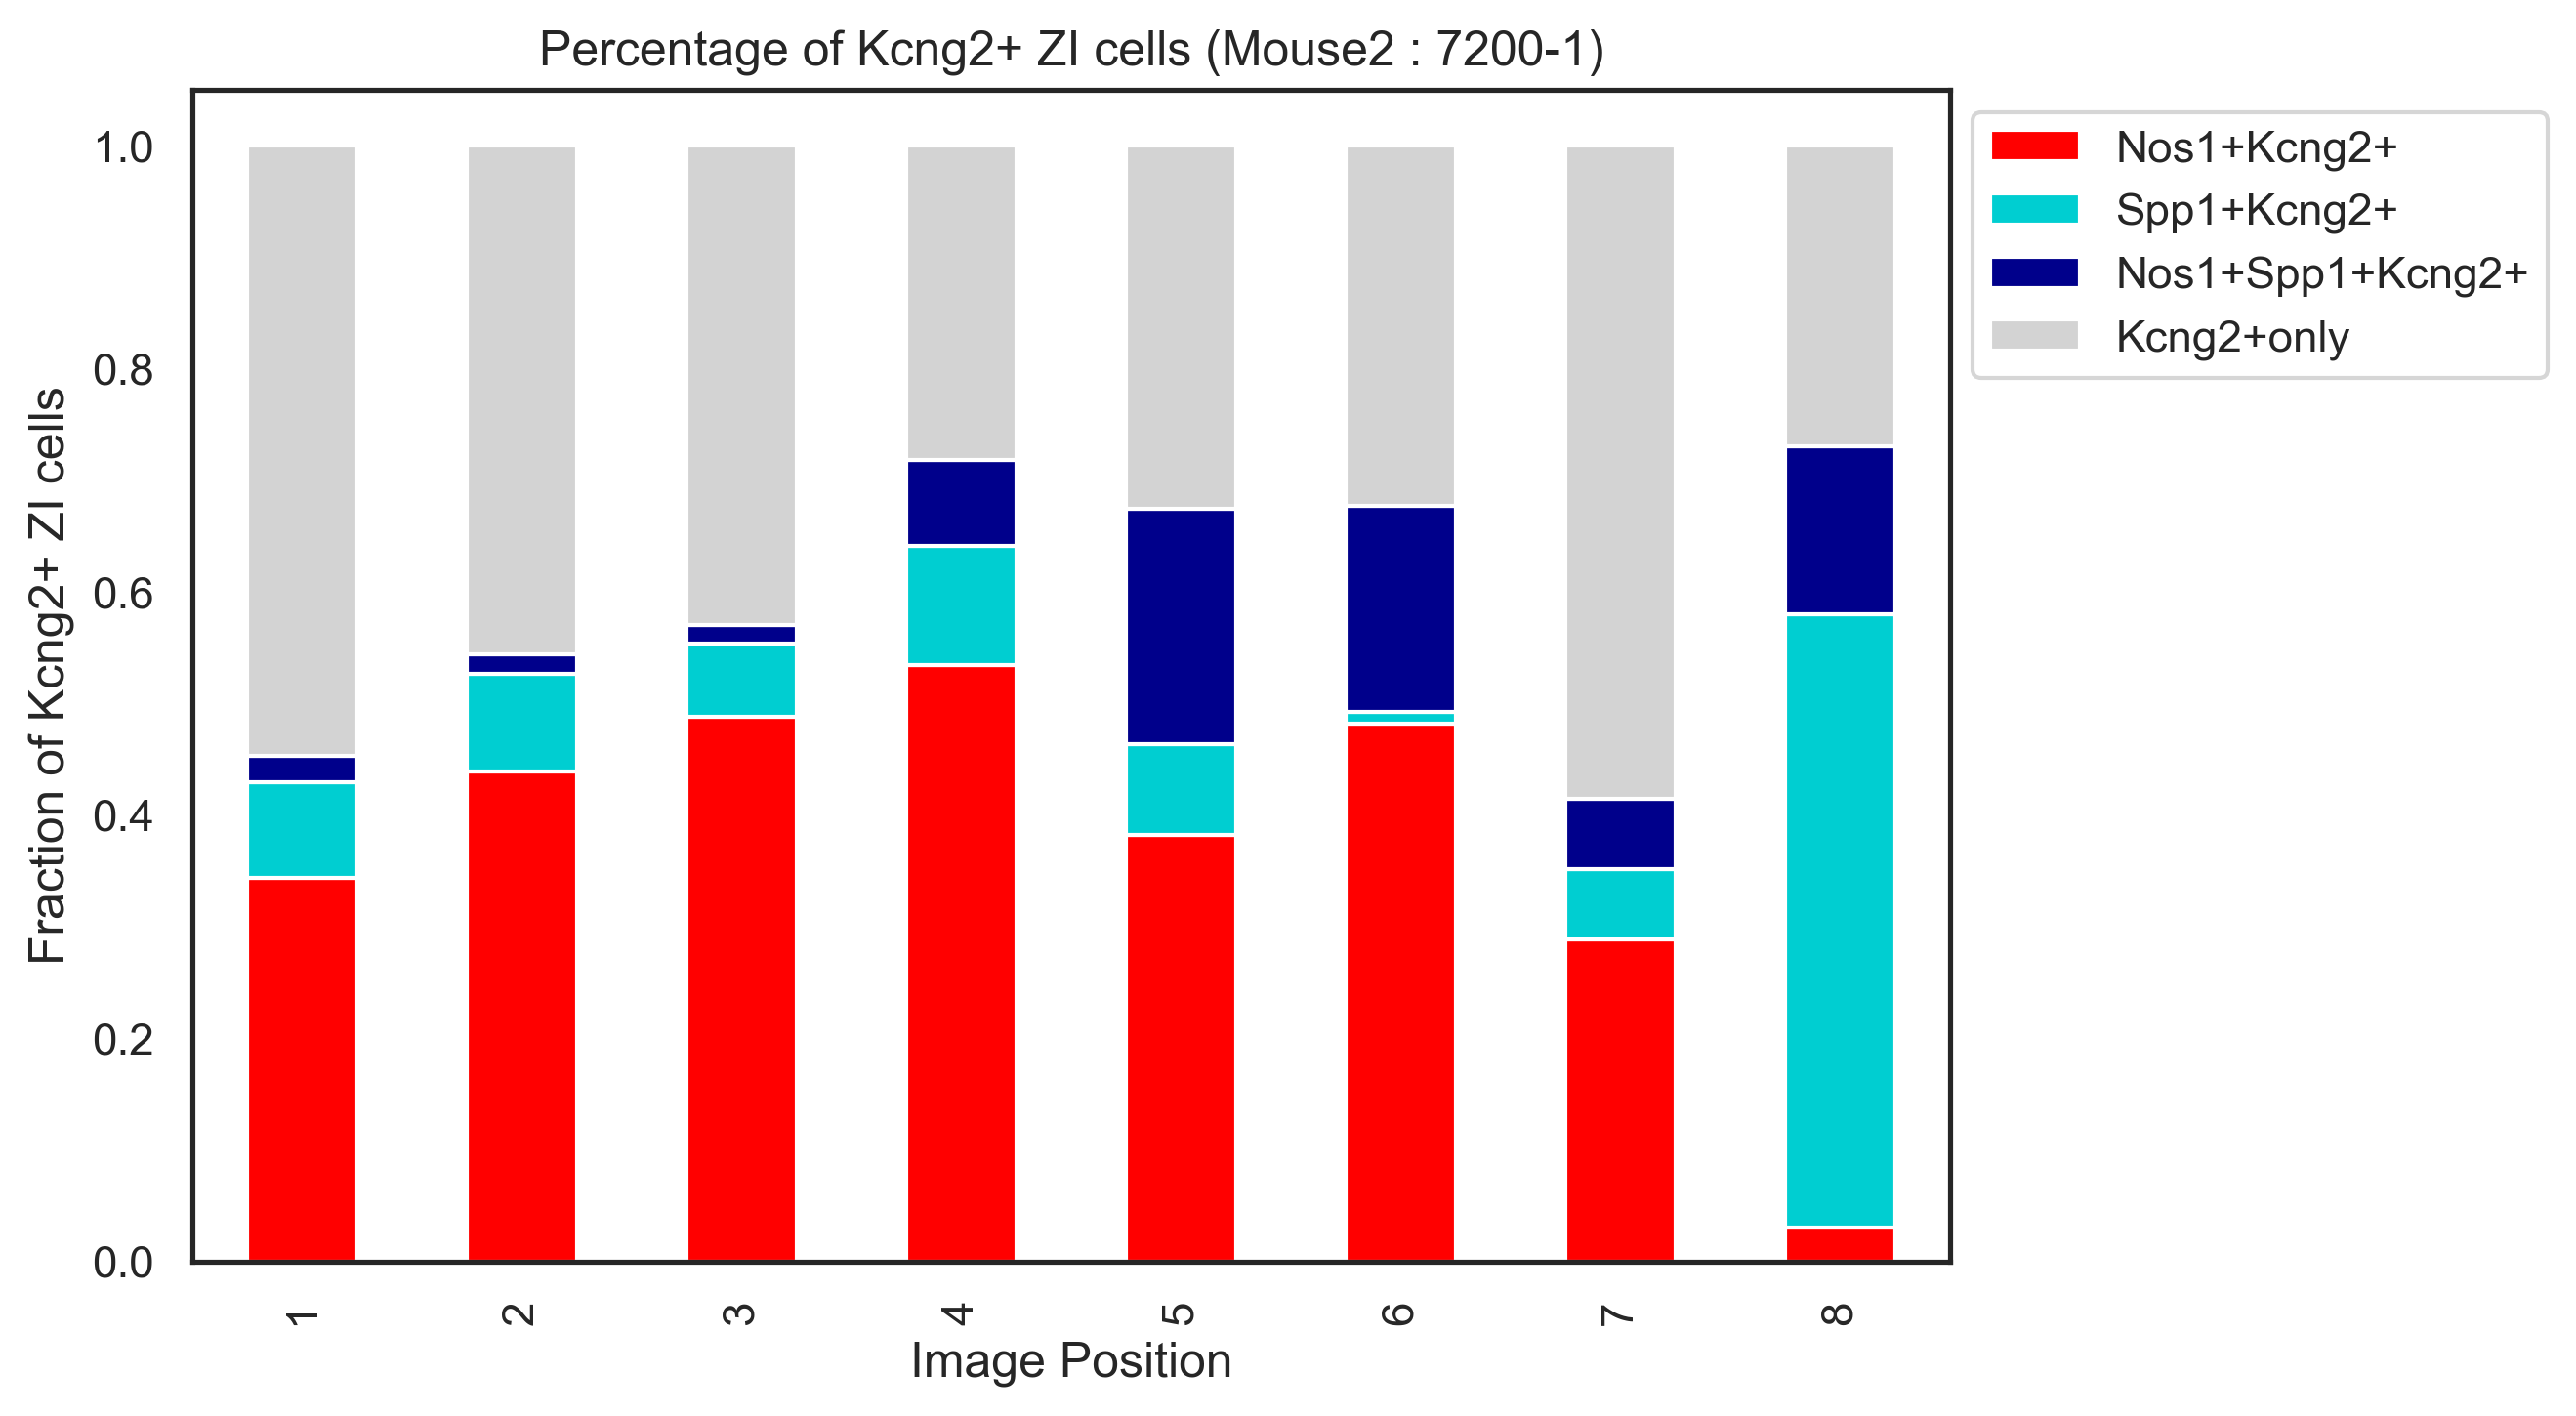

In [55]:
Mouse = '7200-1'
MNum = '2'

fig = plt.figure(figsize = (6,4),dpi=300)

ax1 = fig.add_axes([0,0,1,1])
ax1.set_title('Percentage of Kcng2+ ZI cells (Mouse' + MNum + ' : ' + Mouse + ')' )
ax1.set_xlabel('ML Position Relative to Bregma (mm)')

cellprofilerDF['FileName_RAW'] = cellprofilerDF['FileName_RAW'].str[0:16]
percentcols = [i for i in cellprofilerDF.columns.tolist() if i.find('/ Count_Gad2Neurons') >= 0]

cellprofilerDF['ML Position'] = cellprofilerDF['ML Position'].astype(str)

choose = ['ML Position',
          'FileName_RAW',
          'Image Position',
         'Count_CT_Pure_Nos1_Kcng2 / Count_CT_Kcng2Neurons',
         'Count_CT_Pure_Spp1_Kcng2 / Count_CT_Kcng2Neurons',
         'Count_CT_Nos1_Spp1_Kcng2 / Count_CT_Kcng2Neurons',
         'Count_CT_Kcng2only / Count_CT_Kcng2Neurons',]
         

cellprofilerDF[cellprofilerDF['Mouse ID'] == Mouse][choose].plot(kind = 'bar', 
                              stacked= True, 
                              x = 'Image Position',
                              ax = ax1,
                              color = ['red', 'darkturquoise','darkblue','lightgrey',]) 
                                        
                                       

plt.legend(bbox_to_anchor=(1.0, 1.0), labels = ['Nos1+Kcng2+', 'Spp1+Kcng2+', 'Nos1+Spp1+Kcng2+', 'Kcng2+only'],)
plt.ylabel('Fraction of Kcng2+ ZI cells')
#plt.savefig(savedir + 'StackedBarPlot_Mouse2_Nos1ii24_Kcng2Nos1Spp1.svg', facecolor = 'white', bbox_inches = 'tight')

In [ ]:
cols2 = [x for x in cellprofilerDF.sum().index.tolist() if 
  (x.find('Gad2') != -1)
& (x.find('Count') != -1)
& (x.find('Gad2Neurons') == -1)]




fig = px.pie(cellprofilerDF.sum()[cols2], 
             names = cellprofilerDF.sum()[cols2].index, 
             values = cellprofilerDF.sum()[cols2])
fig.show()

In [ ]:
cols = [x for x in percentplotDF['MarkerCombo'].unique() if 
          (x.find('/ Count_Gad2Neurons') != -1) 
        & (x.find('Count_Gad2Neurons ') == -1) 
        & (x.find('Pure') != -1)]



In [ ]:
cols2 = [x for x in cellprofilerDF.sum().index.tolist() if 
          ((x.find('Pure')) != -1) or
          ((x.find('Gad2') != -1)
        & (x.find('Count_Kcng2_Pax6_Gad2') != -1)
        & (x.find('Gad2Neurons') == -1))]


In [ ]:
x = pd.read_csv('Sum_of_Counts.csv', names = ['MarkerCombo', 'Number'])

In [ ]:
a = pd.DataFrame(columns = ['MarkerCombo', 'Number'],
             data = {'MarkerCombo': 'Gad2 Only',
                     'Number': [x.iloc[9]['Number'] - x.iloc[12]['Number'] - x.iloc[13]['Number'] - x.iloc[4]['Number']]})

In [ ]:
xx = pd.concat([x,a])

In [ ]:
xy = xx[xx['MarkerCombo'].isin(['Pure Kcng2_Gad2', 'Pure Pax6_Gad2', 'Count_Kcng2_Pax6_Gad2','Gad2 Only'])]


In [ ]:
xx['Mouse ID'] = '7200-1'

In [ ]:
names = ['Kcng2+Pax6+Gad2+', 'Kcng2+Gad2+', 'Pax6+Gad2+', 'Gad2 only']
xy['MarkerCombo'] = names

In [ ]:
xy

In [ ]:
fig =px.pie(data_frame=xy, 
       title = 'Percentage Of Gad2+ Cells in the ZI',
       values='Number',
       names= 'MarkerCombo', 
       hover_name = 'MarkerCombo',
       color_discrete_sequence= [ 'lightgray', 'limegreen', 'darkviolet', 'darkorange'],
       hole = 0.5,
       width = 700,
       height = 700)

#pio.write_image(fig, 'Gad2Pax6Kcng2Pie_WithoutGad2Only.pdf')
fig

In [ ]:
ls

In [ ]:
px.pie(data_frame=xy, 
       title = 'Percentage Of Gad2+ Cells in the ZI',
       values='Number',
       hover_name = ['Gad2 Only', 'Pax6+Gad2+', 'Kcng2+Gad2+', 'Kcng2+Pax6+Gad2+'],
       names= 'MarkerCombo', 
       labels = {'MarkerCombo': 'Gad2 Only', 
                 'MarkerCombo':'Pax6+Gad2+', 
                 'MarkerCombo':'Kcng2+Gad2+',
                 'MarkerCombo':'Kcng2+Pax6+Gad2+'},
       
       color_discrete_sequence= ['lightgray', 'limegreen', 'darkviolet', 'darkorange'],
       hole = 0.6,
   )


In [ ]:
px.pie(data_frame=xy, 
       values='Number',
       labels = ['Gad2 Only', 'Pax6+Gad2+', 'Kcng2+Gad2+', 'Kcng2+Pax6+Gad2+'],
       names='MarkerCombo', 
       color_discrete_sequence= ['lightgray', 'limegreen', 'darkviolet', 'darkorange'],
       )